In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

#Đọc file CSV từ BigQuery
data = pd.read_csv("home_credit_default_risk/homecredit_default_risk_predict_result.csv")



# Lưu hình ảnh
# plt.savefig("results/roc_curve.png")

In [33]:
#Đọc file CSV từ BigQuery
data_2 = pd.read_csv("home_credit_default_risk/homecredit_default_risk_predict_result_0.5.csv")

In [23]:
# Chuyển đổi cột từ chuỗi JSON về danh sách
data["predicted_TARGET_probs"] = data["predicted_TARGET_probs"].apply(lambda x: json.loads(x)["predicted_TARGET_probs"])

# Nếu cột trên chứa danh sách, chỉ lấy giá trị xác suất cho label = 1
data["predicted_probability"] = data["predicted_TARGET_probs"].apply(lambda x: x[1]["prob"] if isinstance(x, list) else None)

# Xóa cột cũ
data.drop(columns=["predicted_TARGET_probs"], inplace=True)



# Kiểm tra lại dữ liệu
print(data.head())

KeyError: 'predicted_TARGET_probs'

In [35]:
# Chuyển đổi cột từ chuỗi JSON về danh sách
data_2["predicted_TARGET_probs"] = data_2["predicted_TARGET_probs"].apply(lambda x: json.loads(x)["predicted_TARGET_probs"])

# Nếu cột trên chứa danh sách, chỉ lấy giá trị xác suất cho label = 1
data_2["predicted_probability"] = data_2["predicted_TARGET_probs"].apply(lambda x: x[1]["prob"] if isinstance(x, list) else None)

# Xóa cột cũ
data_2.drop(columns=["predicted_TARGET_probs"], inplace=True)



# Kiểm tra lại dữ liệu
print(data.head())

   predicted_TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0                 0                 NaN          NaN           NaN   
1                 0                 NaN          NaN           NaN   
2                 0                 NaN          NaN           NaN   
3                 0                 NaN          NaN           NaN   
4                 0                 NaN          NaN           NaN   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0              NaN               NaN                  NaN                 NaN   
1              NaN               NaN                  NaN                 NaN   
2              NaN               NaN                  NaN                 NaN   
3              NaN               NaN                  NaN                 NaN   
4              NaN               NaN                  NaN                 NaN   

   NAME_HOUSING_TYPE  WEEKDAY_APPR_PROCESS_START  ...  DAYS_REGISTRATION  \
0               

In [25]:
# Chuyển cột "predicted_probability" về float
data["predicted_probability"] = data["predicted_probability"].astype(float)

In [37]:
# Chuyển cột "predicted_probability" về float
data_2["predicted_probability"] = data_2["predicted_probability"].astype(float)

In [41]:
data_2.head()

,predicted_TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,...,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT_SUM_DEBT_sum,DAYS_DECISION_mean,DAYS_CREDIT_max,DAYS_ENDDATE_FACT_max,predicted_probability,predicted_TARGET_05
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2787,0.712880,NaN,-4.0,NaN,-1854.333333,NaN,NaN,0.865829,0
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-806,0.649168,NaN,-538.0,NaN,-322.750000,NaN,NaN,0.832770,0
2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2383,0.064450,NaN,-478.0,NaN,-478.000000,NaN,NaN,0.824294,0
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-4668,0.510885,NaN,-1788.0,NaN,-1164.000000,NaN,NaN,0.846651,0
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1285,0.202384,NaN,-918.0,NaN,-918.000000,NaN,NaN,0.828817,0


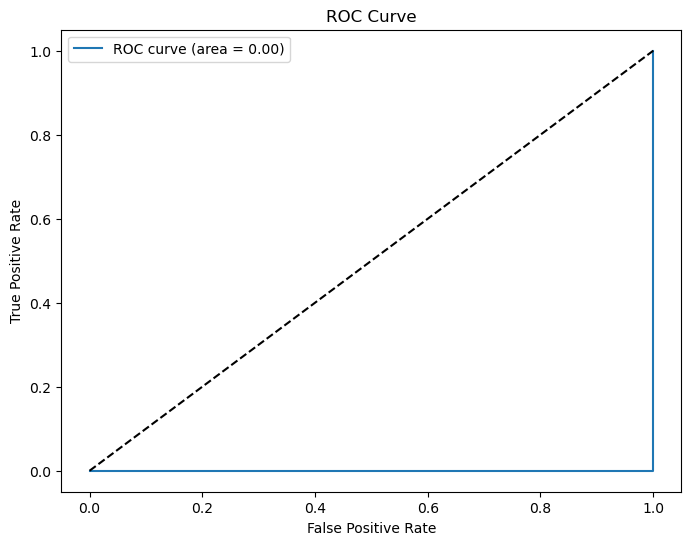

In [27]:
#Tạo ROC curve
fpr, tpr, _ = roc_curve(data["predicted_TARGET"], data["predicted_probability"])
roc_auc = auc(fpr, tpr)

#Vẽ biểu đồ
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Đường baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

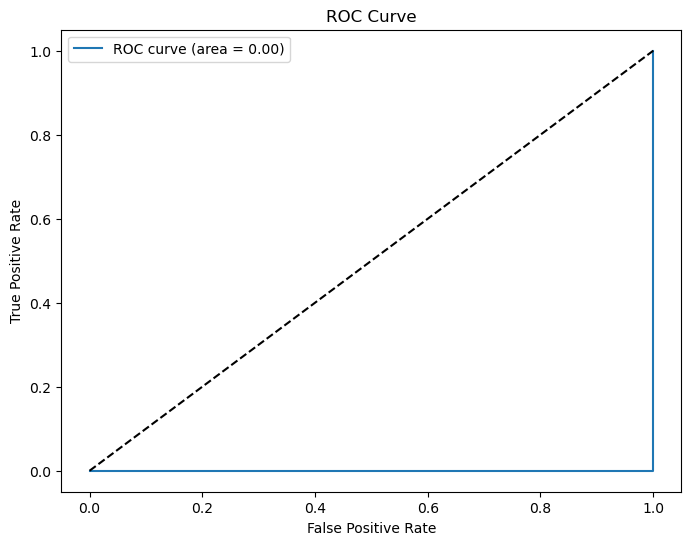

In [43]:
#Tạo ROC curve
fpr, tpr, _ = roc_curve(data_2["predicted_TARGET_05"], data_2["predicted_probability"])
roc_auc = auc(fpr, tpr)

#Vẽ biểu đồ
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Đường baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [31]:
fpr, tpr, thresholds = roc_curve(data["predicted_TARGET"], data["predicted_probability"])

for t, fp, tp in zip(thresholds[:10], fpr[:10], tpr[:10]):
    print(f"Threshold: {t:.3f}, False Positive Rate: {fp:.3f}, True Positive Rate: {tp:.3f}")

Threshold: inf, False Positive Rate: 0.000, True Positive Rate: 0.000
Threshold: 0.872, False Positive Rate: 0.000, True Positive Rate: 0.000
Threshold: 0.872, False Positive Rate: 0.000, True Positive Rate: 0.000
Threshold: 0.872, False Positive Rate: 0.000, True Positive Rate: 0.000
Threshold: 0.872, False Positive Rate: 0.001, True Positive Rate: 0.000
Threshold: 0.872, False Positive Rate: 0.001, True Positive Rate: 0.000
Threshold: 0.872, False Positive Rate: 0.001, True Positive Rate: 0.000
Threshold: 0.872, False Positive Rate: 0.001, True Positive Rate: 0.000
Threshold: 0.872, False Positive Rate: 0.002, True Positive Rate: 0.000
Threshold: 0.872, False Positive Rate: 0.002, True Positive Rate: 0.000


In [53]:
fpr, tpr, thresholds = roc_curve(data_2["predicted_TARGET_05"], data_2["predicted_probability"])

for t, fp, tp in zip(thresholds[:10], fpr[:10], tpr[:10]):
    print(f"Threshold: {t:.3f}, False Positive Rate: {fp:.3f}, True Positive Rate: {tp:.3f}")

Threshold: inf, False Positive Rate: 0.000, True Positive Rate: 0.000
Threshold: 0.872, False Positive Rate: 0.000, True Positive Rate: 0.000
Threshold: 0.872, False Positive Rate: 0.000, True Positive Rate: 0.000
Threshold: 0.872, False Positive Rate: 0.001, True Positive Rate: 0.000
Threshold: 0.872, False Positive Rate: 0.001, True Positive Rate: 0.000
Threshold: 0.872, False Positive Rate: 0.001, True Positive Rate: 0.000
Threshold: 0.872, False Positive Rate: 0.001, True Positive Rate: 0.000
Threshold: 0.872, False Positive Rate: 0.001, True Positive Rate: 0.000
Threshold: 0.872, False Positive Rate: 0.002, True Positive Rate: 0.000
Threshold: 0.872, False Positive Rate: 0.002, True Positive Rate: 0.000


In [49]:
print(data_2["predicted_TARGET_05"].value_counts())

predicted_TARGET_05
0    22783
1       17
Name: count, dtype: int64


In [51]:
print(data["predicted_TARGET"].value_counts())

predicted_TARGET
0    24277
1       19
Name: count, dtype: int64
